<a href="https://colab.research.google.com/github/Alex112525/Neural-networks-fundamentals/blob/main/Multiple_classification_(Reuters_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models, layers, optimizers

#Loading Dataset 

The Reuters dataset from Keras is a collection of newswire articles from the Reuters news agency. It contains 11,228 news articles, which are categorized into 46 different topics. The articles are preprocessed and are represented as sequences of integers, where each integer corresponds to a specific word from a fixed dictionary. The dataset was widely used for text classification and other NLP tasks.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
index_words = { key:value for value, key in reuters.get_word_index().items()}
index_words

In [ ]:
for i in train_data[4]:
  print(index_words.get(i-3), end=" ")

None seton co said its board has received a proposal from chairman and chief executive officer philip d None to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to None arranging the necessary financing it said he intends to ask other members of senior management to participate the company said None owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3 

The purpose of the function is to perform one-hot encoding of the sequences, which is a common preprocessing step in text classification and NLP tasks. The input parameter dim represents the size of the vocabulary or the number of unique words in the text.

In [ ]:
def vectorize(sequence, dim=10000):
  results = np.zeros((len(sequence), dim))
  for i, seq in enumerate(sequence):
    results[i, seq] = 1
  return results

In [ ]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#Build Model



In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape = (10000,), kernel_regularizer=regularizers.l1_l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(46, activation="softmax"))  #Sofmax es mejor para la clasificacion multiple

The softmax function is a function that takes a vector of real numbers and maps it into another vector of real numbers that sums up to 1, so the output can be interpreted as a probability distribution. It's commonly used as the activation function for the output layer in multiclass classification problems.

The basic idea behind the softmax function is to raise each element of the input vector to a power and then divide the result by the sum of all the raised elements. This way, the input elements are transformed into positive values, and their sum is equal to 1, allowing them to be interpreted as probabilities.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

The categorical_crossentropy is a loss function used in multi-class classification problems. In such problems, the target variable has multiple classes, and the goal of the model is to predict the correct class for a given input.

The categorical_crossentropy loss function measures the dissimilarity between the true label distribution and the predicted label distribution. It calculates the distance between the true one-hot encoded label and the predicted probability distribution. The goal of the optimization process is to minimize this loss function.

#Train model

In [ ]:
Model = model.fit(x_train, y_train,
                    epochs = 25,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/25
13/13 [==============================] - 1s 40ms/step - loss: 6.9312 - accuracy: 0.3216 - val_loss: 3.3512 - val_accuracy: 0.5306
Epoch 2/25
13/13 [==============================] - 0s 21ms/step - loss: 3.0316 - accuracy: 0.4775 - val_loss: 2.5442 - val_accuracy: 0.5432
Epoch 3/25
13/13 [==============================] - 0s 20ms/step - loss: 2.6435 - accuracy: 0.5111 - val_loss: 2.3696 - val_accuracy: 0.5399
Epoch 4/25
13/13 [==============================] - 0s 21ms/step - loss: 2.5105 - accuracy: 0.5397 - val_loss: 2.2574 - val_accuracy: 0.6007
Epoch 5/25
13/13 [==============================] - 0s 21ms/step - loss: 2.3999 - accuracy: 0.5602 - val_loss: 2.2226 - val_accuracy: 0.6093
Epoch 6/25
13/13 [==============================] - 0s 20ms/step - loss: 2.3373 - accuracy: 0.5845 - val_loss: 2.1884 - val_accuracy: 0.6430
Epoch 7/25
13/13 [==============================] - 0s 21ms/step - loss: 2.2877 - accuracy: 0.5979 - val_loss: 2.1223 - val_accuracy: 0.6798
Epoch 8/25
13

##Loss graph

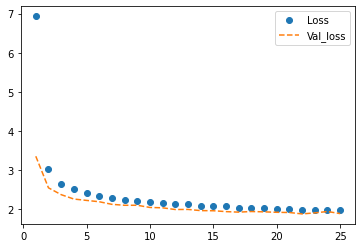

In [ ]:
his_dic = Model.history
epoch=range(1,26)
plt.plot(epoch, his_dic["loss"], "o", label="Loss")
plt.plot(epoch, his_dic["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()

##Accuracy graph

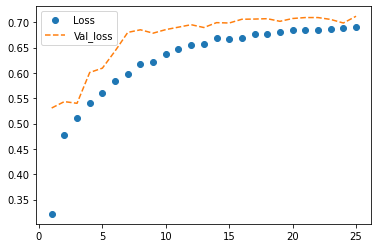

In [ ]:
his_dic = Model.history
epoch=range(1,26)
plt.plot(epoch, his_dic["accuracy"], "o", label="Loss")
plt.plot(epoch, his_dic["val_accuracy"], "--", label="Val_loss")
plt.legend()
plt.show()